Import Python libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import seaborn as sns
import cartopy.crs as ccrs
import pandas as pd
import glob
import pyresample

Open data

In [9]:
open_path = 'D:/analyysi/Plotting_ForLoop_results/Stacked_diffs_files/'

In [2]:
Save_path = "D:/analyysi/Masking_bare_ice_surfaces_for_SMAC/Masked_data/"

In [10]:
stacked_diffs = xr.open_dataset(open_path+'Stacked_file_201206.nc')

In [11]:
stacked_diffs

<xarray.Dataset>
Dimensions:            (time: 425, y: 360, x: 360)
Coordinates:
  * time               (time) datetime64[ns] 2012-06-01 ... 2012-07-01
    lon                (y, x) float64 ...
    lat                (y, x) float64 ...
Dimensions without coordinates: y, x
Data variables:
    Diff_alb_SAL_TOA   (time, y, x) float64 ...
    TOA_alb            (time, y, x) float64 ...
    SAL_alb            (time, y, x) float64 ...
    Water_vapour       (time, y, x) float64 ...
    Ozone              (time, y, x) float64 ...
    Surface_pressure   (time, y, x) float64 ...
    sun_azimuth        (time, y, x) float64 ...
    sun_zenith         (time, y, x) float64 ...
    satellite_azimuth  (time, y, x) float64 ...
    satellite_zenith   (time, y, x) float64 ...

Open masks

In [13]:
Mask1 = np.loadtxt("D:/analyysi/Masking_bare_ice_surfaces_for_SMAC/Mask1_sea.txt")
print(Mask1)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [25]:
Mask2 = np.loadtxt("D:/analyysi/Masking_bare_ice_surfaces_for_SMAC/Mask2_sea_icesheet.txt")
print(Mask2)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


Mask data

In [21]:
Mask1_stacked_diffs = stacked_diffs*Mask1

In [24]:
Mask1_stacked_diffs.to_netcdf(Save_path + 'Stacked_diffs_062012_Mask1_sea' +  '.nc')

In [26]:
Mask2_stacked_diffs = stacked_diffs*Mask2

In [27]:
Mask2_stacked_diffs.to_netcdf(Save_path + 'Stacked_diffs_062012_Mask2_sea' +  '.nc')

Try plotting data

In [31]:
Mask1_stacked_diffs_mean = Mask1_stacked_diffs.resample(time='1D').mean()

In [32]:
Mask1_Diff_alb_SAL_TOA = Mask1_stacked_diffs_mean['Diff_alb_SAL_TOA']

(array([4.0000e+00, 2.8000e+01, 1.0400e+02, 2.8900e+02, 1.5740e+03,
        4.9253e+04, 7.3844e+04, 5.7602e+04, 3.4000e+01, 1.0000e+00]),
 array([-0.6570186 , -0.54448059, -0.43194258, -0.31940457, -0.20686656,
        -0.09432855,  0.01820947,  0.13074748,  0.24328549,  0.3558235 ,
         0.46836151]),
 <BarContainer object of 10 artists>)

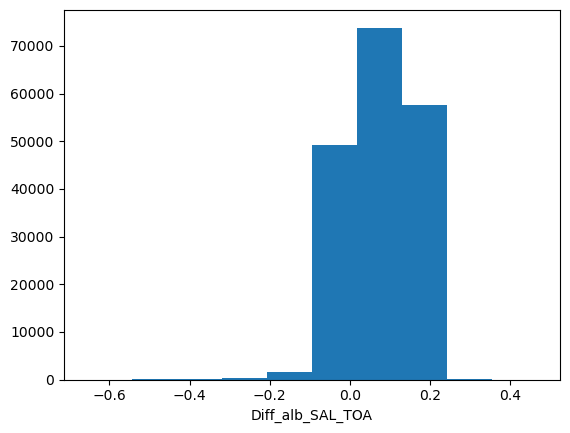

In [35]:
Mask1_Diff_alb_SAL_TOA.plot()

In [36]:
Mask2_stacked_diffs_mean = Mask2_stacked_diffs.resample(time='1D').mean()

In [37]:
Mask2_Diff_alb_SAL_TOA = Mask2_stacked_diffs_mean['Diff_alb_SAL_TOA']

(array([5.00000e+00, 3.00000e+01, 1.08000e+02, 2.99000e+02, 1.63300e+03,
        5.09350e+04, 7.88070e+04, 1.05556e+05, 2.65000e+02, 3.00000e+00]),
 array([-0.6570186 , -0.54448059, -0.43194258, -0.31940457, -0.20686656,
        -0.09432855,  0.01820947,  0.13074748,  0.24328549,  0.3558235 ,
         0.46836151]),
 <BarContainer object of 10 artists>)

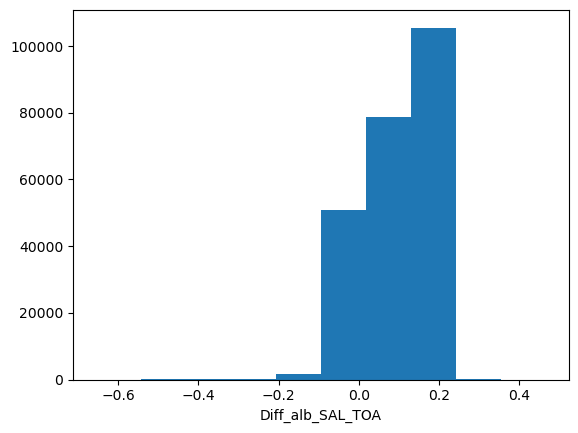

In [38]:
Mask2_Diff_alb_SAL_TOA.plot()